FOML ASSIGNMENT - 1 NAREN M B (211701036)

In [ ]:
import pandas as pd
file_path = "/content/SampleSuperstore.csv"
data = pd.read_csv(file_path)
data_info = data.info()
data_head = data.head()
data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


(None,
         Ship Mode    Segment        Country             City       State  \
 0    Second Class   Consumer  United States        Henderson    Kentucky   
 1    Second Class   Consumer  United States        Henderson    Kentucky   
 2    Second Class  Corporate  United States      Los Angeles  California   
 3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 
    Postal Code Region         Category Sub-Category     Sales  Quantity  \
 0        42420  South        Furniture    Bookcases  261.9600         2   
 1        42420  South        Furniture       Chairs  731.9400         3   
 2        90036   West  Office Supplies       Labels   14.6200         2   
 3        33311  South        Furniture       Tables  957.5775         5   
 4        33311  South  Office Supplies      Storage   22.3680         2   
 
    Discount    Profit  
 0      0.00   41.9136  
 1      0.00  219.582

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('SampleSuperstore.csv')

Linear Regression :

In [ ]:
X_linear = data[['Quantity', 'Discount', 'Profit']]
y_linear = data['Sales']

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

y_pred_linear = linear_model.predict(X_test_linear)
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
print(f'Mean Squared Error for Linear Regression: {mse_linear}')

Mean Squared Error for Linear Regression: 680377.4563719594


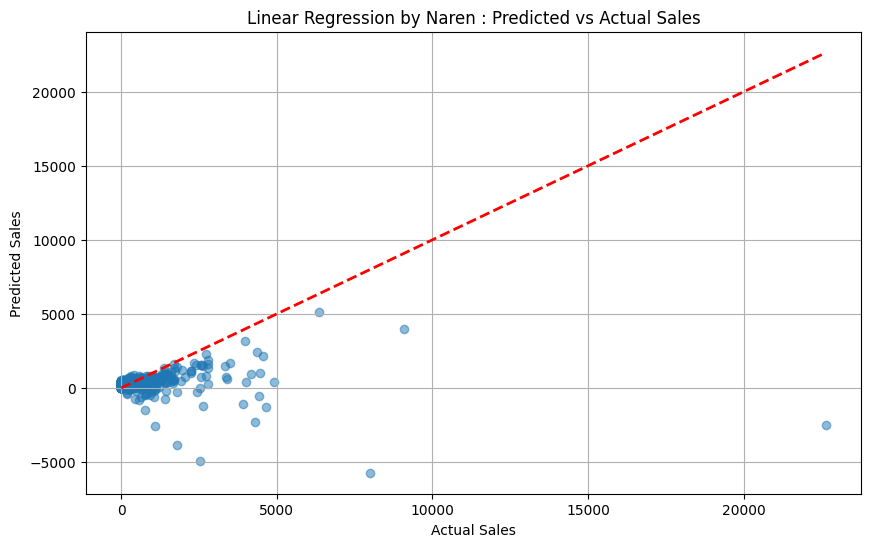

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.5)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Predicted vs Actual Sales')
plt.grid(True)
plt.show()

Logistic Regression

In [ ]:
data['Profitable'] = np.where(data['Profit'] > 0, 1, 0)
X_logistic = data[['Sales', 'Quantity', 'Discount']]
y_logistic = data['Profitable']

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train_logistic)
X_test_logistic = scaler.transform(X_test_logistic)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f'Accuracy for Logistic Regression: {accuracy_logistic}')

Accuracy for Logistic Regression: 0.943471735867934


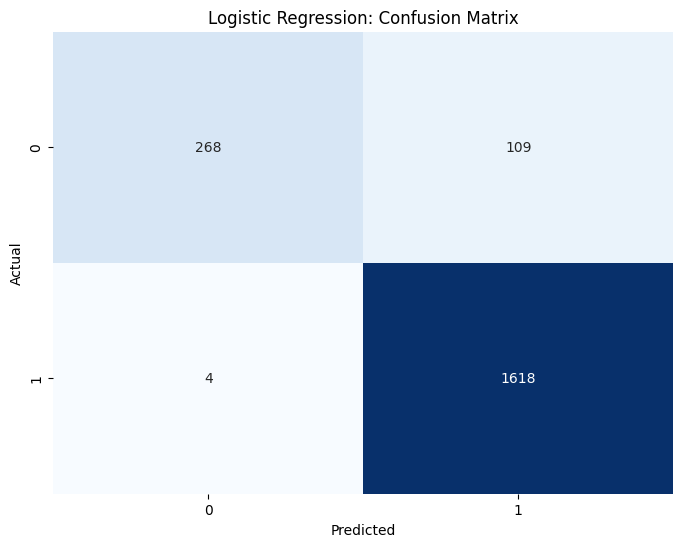

In [ ]:
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

# Analysis Results:
# Linear Regression:
# The Mean Squared Error (MSE) for predicting "Sales" using "Quantity," "Discount," and "Profit" is approximately 680,377.46. A lower MSE indicates better model performance, so there's room for improvement in this model.

# Logistic Regression:
# The accuracy for predicting whether a sale is profitable or not based on "Sales," "Quantity," and "Discount" is 94.35%. This high accuracy suggests that the logistic regression model is performing well.